In [257]:
#Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### Part 1: Data Preparation (Python/SQL)
Q-Download the provided dataset from Data.gov.

Q-Import the dataset into your chosen data analysis tool (Python or SQL).

Q-Clean the data by handling missing values, duplicates, and any inconsistencies.

In [258]:
df=pd.read_csv('Warehouse_and_Retail_Sales.csv')

In [259]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [262]:
df.shape

(307645, 9)

#### There are 307645 rows and 9 columns

In [263]:
#Looking for Null values
df.isna().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

#### Since there are a few null values only, we will drop them.

In [264]:
df.dropna(inplace=True)

In [265]:
df.isna().sum()

YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

In [194]:
#Checking for duplicate rows
df.duplicated().sum()

0

#### There are no duplicate rows.

In [266]:
#Taking a look at numerical columns of the dataset.
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307477.000000,307477.000000,307477.000000,307477.000000,307477.000000
mean,2018.438238,6.424064,7.003644,6.938177,25.375561
std,1.083080,3.461853,30.387012,30.244239,249.500572
min,2017.000000,1.000000,-6.490000,-38.490000,-4996.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.260000,3.000000,5.000000
max,2020.000000,12.000000,1816.490000,1990.830000,18317.000000


#### Part 2: Exploratory Data Analysis (Python/SQL)

#### Q-Calculate and visualize each year's total sales (retail and warehouse).

In [269]:
#Introducing new column : Total Sales= Retail Sales + Warehouse Sales
df['Total Sales']=df['RETAIL SALES']+df['WAREHOUSE SALES']

Text(0, 0.5, 'Total Sales')

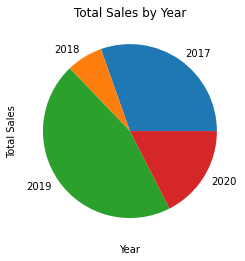

In [272]:
yearly_sales = df.groupby('YEAR')['Total Sales'].sum()
yearly_sales.plot(kind='pie')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')

#### Clearly, most sales have been made in 2019.

#### Q-Determine the top 5 suppliers based on total sales (both retail and warehouse) for the entire dataset.

In [320]:
#TOtal Suppliers
len(df['SUPPLIER'].unique())

396

                 SUPPLIER  Total Sales
0           CROWN IMPORTS   1736309.17
1  MILLER BREWING COMPANY   1512585.15
2      ANHEUSER BUSCH INC   1441131.66
3            HEINEKEN USA    885936.37
4      E & J GALLO WINERY    363634.31


Text(0.5, 0, 'Supplier Name')

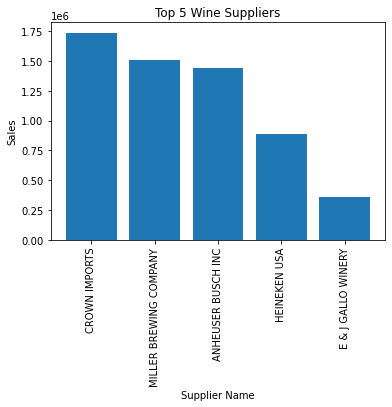

In [321]:
grouped_data=pd.DataFrame(df.groupby('SUPPLIER')['Total Sales'].sum())
sorted_data=grouped_data.sort_values(by='Total Sales',ascending=False).reset_index().head(5)
print(sorted_data)
plt.bar(sorted_data['SUPPLIER'],sorted_data['Total Sales'])
plt.title('Top 5 Wine Suppliers')
plt.xticks(rotation=90)
plt.ylabel('Sales')
plt.xlabel('Supplier Name')

#### Q-Identify the top 10 best-selling items (based on total sales) and provide their descriptions and types.

In [322]:
df3 = pd.DataFrame(df.groupby('ITEM CODE')['Total Sales'].sum()).sort_values(by='Total Sales',ascending=False).head(10)
df3.reset_index(inplace=True)
df3
Best_Selling_items=pd.DataFrame(columns=['ITEM CODE','Total Sales','ITEM DESCRIPTION','ITEM TYPE'])
for i in range(0,10):
    sales=df3['Total Sales'][i]
    code=df3['ITEM CODE'][i]
    desc=list(df[df['ITEM CODE']==code]['ITEM DESCRIPTION'])[0]
    item_type=list(df[df['ITEM CODE']==code]['ITEM TYPE'])[0]
    new_row={'ITEM CODE':code,'Total Sales':sales,'ITEM DESCRIPTION':desc,'ITEM TYPE':item_type}
    Best_Selling_items=Best_Selling_items.append(new_row,ignore_index=True)
print(Best_Selling_items)    


  ITEM CODE  Total Sales                    ITEM DESCRIPTION ITEM TYPE
0     23445    328224.83        CORONA EXTRA LOOSE NR - 12OZ      BEER
1     96750    257679.62         CORONA EXTRA 2/12 NR - 12OZ      BEER
2     23886    189711.21            HEINEKEN LOOSE NR - 12OZ      BEER
3     96970    162224.15             HEINEKEN 2/12 NR - 12OZ      BEER
4     90590    148926.40         MILLER LITE 30PK CAN - 12OZ      BEER
5     96741    132665.61          CORONA EXTRA 4/6 NR - 12OZ      BEER
6     25883    121846.80  MODELO ESPECIAL 24 LOOSE NR - 12OZ      BEER
7     90468    108615.97                  BUD LIGHT 30PK CAN      BEER
8     96083    105184.92              HEINEKEN 4/6 NR - 12OZ      BEER
9     23314    100664.44         CORONA EXTRA 18PK NR - 12OZ      BEER


#### From the above dataset, it can be clearly seen that the type of best selling type is Beer

#### Q-Calculate the monthly average retail sales and warehouse sales separately for each year. Analyse whether there are any seasonal trends in sales data. Provide visualisations to support your analysis.

2020
   MONTH  RETAIL SALES  WAREHOUSE SALES
0      1      6.157127        23.818933
1      3      9.450849        27.576390
2      7      8.208838        37.420200
3      9      6.971839        31.591390


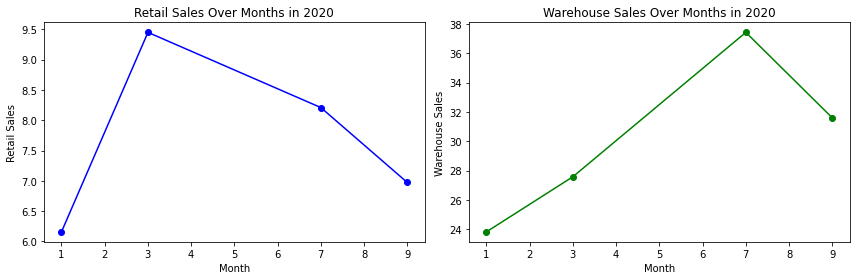

2017
   MONTH  RETAIL SALES  WAREHOUSE SALES
0      6      7.145487        27.850703
1      7      7.114624        24.342291
2      8      6.411406        28.181033
3      9      6.758769        22.862328
4     10      6.550944        22.393842
5     11      6.766893        23.500630
6     12      9.080119        21.298560


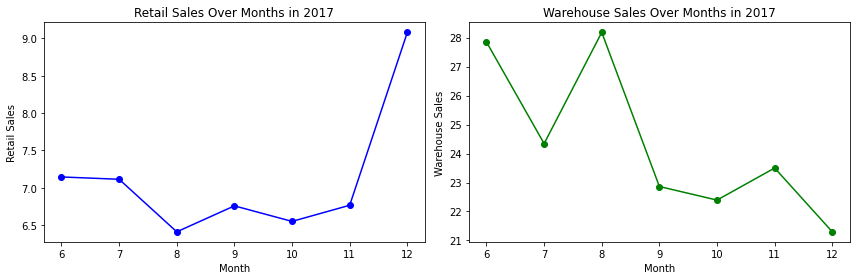

2018
   MONTH  RETAIL SALES  WAREHOUSE SALES
0      1      5.680690        19.084146
1      2      5.940607        20.243378


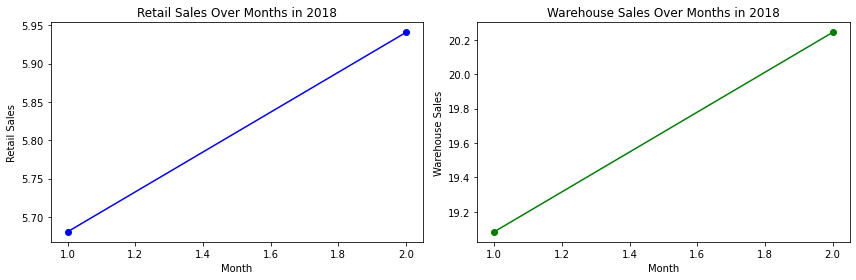

2019
    MONTH  RETAIL SALES  WAREHOUSE SALES
0       1      6.143881        22.750888
1       2      6.521822        20.291400
2       3      6.660169        23.178361
3       4      6.311545        23.519635
4       5      7.335529        29.664419
5       6      7.371886        28.117295
6       7      7.264269        30.058245
7       8      7.304384        28.822726
8       9      6.615581        25.655305
9      10      6.677625        26.815389
10     11      7.850055        23.327786


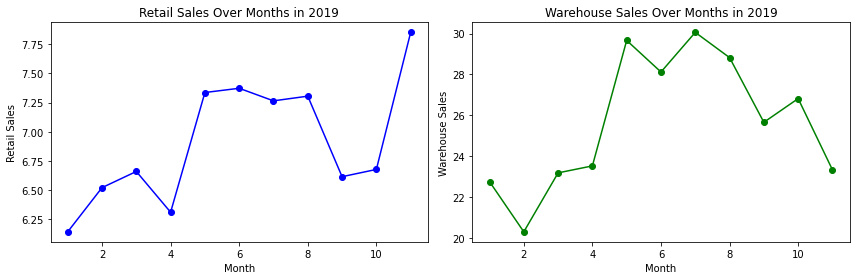

In [276]:
big_df=pd.DataFrame()
year_list=list(df['YEAR'].unique())
for year in year_list:
    print(year)
    new_df=df[df['YEAR']==year][['MONTH','RETAIL SALES','WAREHOUSE SALES']]
    new_df=pd.DataFrame(new_df.groupby('MONTH')['RETAIL SALES','WAREHOUSE SALES'].mean())
    new_df=new_df.reset_index()
    print(new_df)
    big_df=big_df.concat()
    # Create two subplots in one row
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # First chart (RETAIL SALES)
    ax1.plot(new_df['MONTH'], new_df['RETAIL SALES'], marker='o', color='blue')
    ax1.set_title('Retail Sales Over Months in {}'.format(year))
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Retail Sales')

    # Second chart (WAREHOUSE SALES)
    ax2.plot(new_df['MONTH'], new_df['WAREHOUSE SALES'], marker='o', color='green')
    ax2.set_title('Warehouse Sales Over Months in {}'.format(year))
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Warehouse Sales')

    # Automatically adjust layout to prevent overlapping
    plt.tight_layout()

    # Display the charts
    plt.show()

#### Q-Calculate the total sales for each item type and identify which item type contributes the most to overall sales.

      ITEM TYPE  Total Sales
0          BEER   7101457.04
1          WINE   1903483.50
2        LIQUOR    897597.70
3          KEGS    118431.00
4   NON-ALCOHOL     53299.90
5  STR_SUPPLIES      2234.90
6           REF       663.63
7       DUNNAGE   -121307.00


Text(0, 0.5, 'Total Sales')

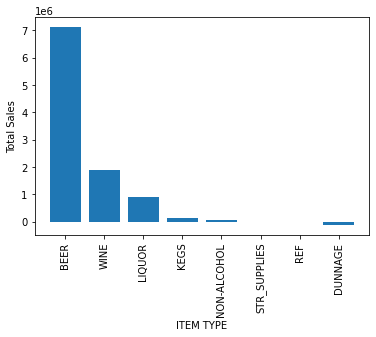

In [331]:
df4=pd.DataFrame(df.groupby('ITEM TYPE')['Total Sales'].sum())
df4=df4.sort_values(by='Total Sales',ascending=False)
df4=df4.reset_index()
print(df4)
plt.bar(height=df4['Total Sales'],x=df4['ITEM TYPE'])
plt.xlabel('ITEM TYPE')
plt.xticks(rotation=90)
plt.ylabel('Total Sales')


##### Thus , beer type contributes most to the overall sales.